In [41]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup as bs
import requests
import scipy.stats as stats
import sklearn.metrics as metrics
from scipy.stats.mstats import winsorize

In [42]:
session=requests.session()
headers={"User-Agent":"Mozilla/5.0 (X11; Linux x86_64; rv:60.0) Gecko/20100101 Firefox/60.0","Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8"}
url = 'https://www.cars.com/shopping/results/?page=1&page_size=100&dealer_id=&keyword=&list_price_max=&list_price_min=&makes[]=audi&maximum_distance=30&mileage_max=&sort=best_match_desc&stock_type=used&year_max=&year_min=&zip=60606'
req=requests.get(url)
soup=bs(req.text,'html.parser')
url2 = 'https://www.cars.com/shopping/results/?page=2&page_size=100&dealer_id=&keyword=&list_price_max=&list_price_min=&makes[]=audi&maximum_distance=30&mileage_max=&sort=best_match_desc&stock_type=used&year_max=&year_min=&zip=60606'
req2=requests.get(url2)
soup2=bs(req2.text,'html.parser')
url3 = 'https://www.cars.com/shopping/results/?page=3&page_size=100&dealer_id=&keyword=&list_price_max=&list_price_min=&makes[]=audi&maximum_distance=30&mileage_max=&sort=best_match_desc&stock_type=used&year_max=&year_min=&zip=60606'
req3=requests.get(url3)
soup3=bs(req3.text,'html.parser')
url4 = 'https://www.cars.com/shopping/results/?page=4&page_size=100&dealer_id=&keyword=&list_price_max=&list_price_min=&makes[]=audi&maximum_distance=30&mileage_max=&sort=best_match_desc&stock_type=used&year_max=&year_min=&zip=60606'
req4=requests.get(url4)
soup4=bs(req4.text,'html.parser')
url5 = 'https://www.cars.com/shopping/results/?page=5&page_size=100&dealer_id=&keyword=&list_price_max=&list_price_min=&makes[]=audi&maximum_distance=30&mileage_max=&sort=best_match_desc&stock_type=used&year_max=&year_min=&zip=60606'
req5=requests.get(url5)
soup5=bs(req5.text,'html.parser')
url6 = 'https://www.cars.com/shopping/results/?page=6&page_size=100&dealer_id=&keyword=&list_price_max=&list_price_min=&makes[]=audi&maximum_distance=30&mileage_max=&sort=best_match_desc&stock_type=used&year_max=&year_min=&zip=60606'
req6=requests.get(url6)
soup6=bs(req6.text,'html.parser')
url7 = 'https://www.cars.com/shopping/results/?page=7&page_size=100&dealer_id=&keyword=&list_price_max=&list_price_min=&makes[]=audi&maximum_distance=30&mileage_max=&sort=best_match_desc&stock_type=used&year_max=&year_min=&zip=60606'
req7=requests.get(url7)
soup7=bs(req7.text,'html.parser')
url8 = 'https://www.cars.com/shopping/results/?page=8&page_size=100&dealer_id=&keyword=&list_price_max=&list_price_min=&makes[]=audi&maximum_distance=30&mileage_max=&sort=best_match_desc&stock_type=used&year_max=&year_min=&zip=60606'
req8=requests.get(url8)
soup8=bs(req8.text,'html.parser')

In [43]:
DESCRIPTION = []
for element in soup.find_all('a',class_='vehicle-card-link'):
    DESCRIPTION.append(element.text.replace('\n','').split(' ',1))
for element in soup2.find_all('a',class_='vehicle-card-link'):
    DESCRIPTION.append(element.text.replace('\n','').split(' ',1))
for element in soup3.find_all('a',class_='vehicle-card-link'):
    DESCRIPTION.append(element.text.replace('\n','').split(' ',1))
for element in soup4.find_all('a',class_='vehicle-card-link'):
    DESCRIPTION.append(element.text.replace('\n','').split(' ',1))
for element in soup5.find_all('a',class_='vehicle-card-link'):
    DESCRIPTION.append(element.text.replace('\n','').split(' ',1))
for element in soup6.find_all('a',class_='vehicle-card-link'):
    DESCRIPTION.append(element.text.replace('\n','').split(' ',1))
for element in soup7.find_all('a',class_='vehicle-card-link'):
    DESCRIPTION.append(element.text.replace('\n','').split(' ',1))
for element in soup8.find_all('a',class_='vehicle-card-link'):
    DESCRIPTION.append(element.text.replace('\n','').split(' ',1))

len(DESCRIPTION)

807

In [44]:
DEALER = []
for element in soup.find_all('div',class_='dealer-name'):
    DEALER.append(element.text.replace('\n',''))
for element in soup2.find_all('div',class_='dealer-name'):
    DEALER.append(element.text.replace('\n',''))
for element in soup3.find_all('div',class_='dealer-name'):
    DEALER.append(element.text.replace('\n',''))
for element in soup4.find_all('div',class_='dealer-name'):
    DEALER.append(element.text.replace('\n',''))
for element in soup5.find_all('div',class_='dealer-name'):
    DEALER.append(element.text.replace('\n',''))
for element in soup6.find_all('div',class_='dealer-name'):
    DEALER.append(element.text.replace('\n',''))
for element in soup7.find_all('div',class_='dealer-name'):
    DEALER.append(element.text.replace('\n',''))
for element in soup8.find_all('div',class_='dealer-name'):
    DEALER.append(element.text.replace('\n',''))

len(DEALER)

807

In [45]:
MILES_DRIVEN = []
for element in soup.find_all('div',class_='mileage'):
    MILES_DRIVEN.append(element.text.replace('\n','').replace(',','').replace('mi.','').strip())
for element in soup2.find_all('div',class_='mileage'):
    MILES_DRIVEN.append(element.text.replace('\n','').replace(',','').replace('mi.','').strip())
for element in soup3.find_all('div',class_='mileage'):
    MILES_DRIVEN.append(element.text.replace('\n','').replace(',','').replace('mi.','').strip())
for element in soup4.find_all('div',class_='mileage'):
    MILES_DRIVEN.append(element.text.replace('\n','').replace(',','').replace('mi.','').strip())
for element in soup5.find_all('div',class_='mileage'):
    MILES_DRIVEN.append(element.text.replace('\n','').replace(',','').replace('mi.','').strip())
for element in soup6.find_all('div',class_='mileage'):
    MILES_DRIVEN.append(element.text.replace('\n','').replace(',','').replace('mi.','').strip())
for element in soup7.find_all('div',class_='mileage'):
    MILES_DRIVEN.append(element.text.replace('\n','').replace(',','').replace('mi.','').strip())
for element in soup8.find_all('div',class_='mileage'):
    MILES_DRIVEN.append(element.text.replace('\n','').replace(',','').replace('mi.','').strip())

MILES_DRIVEN = list(map(float,MILES_DRIVEN))
len(MILES_DRIVEN)

807

In [46]:
RATE = []
for element in soup.find_all('span',class_='sds-rating__count'):
    RATE.append(element.text.replace('\n',''))
for element in soup2.find_all('span',class_='sds-rating__count'):
    RATE.append(element.text.replace('\n',''))
for element in soup3.find_all('span',class_='sds-rating__count'):
    RATE.append(element.text.replace('\n',''))
for element in soup4.find_all('span',class_='sds-rating__count'):
    RATE.append(element.text.replace('\n',''))
for element in soup5.find_all('span',class_='sds-rating__count'):
    RATE.append(element.text.replace('\n',''))
for element in soup6.find_all('span',class_='sds-rating__count'):
    RATE.append(element.text.replace('\n',''))
for element in soup7.find_all('span',class_='sds-rating__count'):
    RATE.append(element.text.replace('\n',''))
for element in soup8.find_all('span',class_='sds-rating__count'):
    RATE.append(element.text.replace('\n',''))

RATE = list(map(float,RATE))

In [47]:
NO_OF_REVIEWS = []
for element in soup.find_all('span',class_='sds-rating__link sds-button-link'):
    NO_OF_REVIEWS.append(element.text.replace('\n','').replace('(','').replace(')','').replace('reviews','').replace('review','').replace(',','').strip())
for element in soup2.find_all('span',class_='sds-rating__link sds-button-link'):
    NO_OF_REVIEWS.append(element.text.replace('\n','').replace('(','').replace(')','').replace('reviews','').replace('review','').replace(',','').strip())
for element in soup3.find_all('span',class_='sds-rating__link sds-button-link'):
    NO_OF_REVIEWS.append(element.text.replace('\n','').replace('(','').replace(')','').replace('reviews','').replace('review','').replace(',','').strip())
for element in soup4.find_all('span',class_='sds-rating__link sds-button-link'):
    NO_OF_REVIEWS.append(element.text.replace('\n','').replace('(','').replace(')','').replace('reviews','').replace('review','').replace(',','').strip())
for element in soup5.find_all('span',class_='sds-rating__link sds-button-link'):
    NO_OF_REVIEWS.append(element.text.replace('\n','').replace('(','').replace(')','').replace('reviews','').replace('review','').replace(',','').strip())
for element in soup6.find_all('span',class_='sds-rating__link sds-button-link'):
    NO_OF_REVIEWS.append(element.text.replace('\n','').replace('(','').replace(')','').replace('reviews','').replace('review','').replace(',','').strip())
for element in soup7.find_all('span',class_='sds-rating__link sds-button-link'):
    NO_OF_REVIEWS.append(element.text.replace('\n','').replace('(','').replace(')','').replace('reviews','').replace('review','').replace(',','').strip())
for element in soup8.find_all('span',class_='sds-rating__link sds-button-link'):
    NO_OF_REVIEWS.append(element.text.replace('\n','').replace('(','').replace(')','').replace('reviews','').replace('review','').replace(',','').strip())

NO_OF_REVIEWS = list(map(int,NO_OF_REVIEWS))

In [48]:
PRICE = []
for element in soup.find_all('span',class_='primary-price'):
    PRICE.append(element.text.replace('\n','').replace(',','').replace('$',''))
for element in soup2.find_all('span',class_='primary-price'):
    PRICE.append(element.text.replace('\n','').replace(',','').replace('$',''))
for element in soup3.find_all('span',class_='primary-price'):
    PRICE.append(element.text.replace('\n','').replace(',','').replace('$',''))
for element in soup4.find_all('span',class_='primary-price'):
    PRICE.append(element.text.replace('\n','').replace(',','').replace('$',''))
for element in soup5.find_all('span',class_='primary-price'):
    PRICE.append(element.text.replace('\n','').replace(',','').replace('$',''))
for element in soup6.find_all('span',class_='primary-price'):
    PRICE.append(element.text.replace('\n','').replace(',','').replace('$',''))
for element in soup7.find_all('span',class_='primary-price'):
    PRICE.append(element.text.replace('\n','').replace(',','').replace('$',''))
for element in soup8.find_all('span',class_='primary-price'):
    PRICE.append(element.text.replace('\n','').replace(',','').replace('$',''))

PRICE = list(map(float,PRICE))

In [49]:
list_of_tuples = list(zip(DESCRIPTION, DEALER, MILES_DRIVEN ,RATE ,NO_OF_REVIEWS, PRICE ))

In [50]:
df = pd.DataFrame(list_of_tuples, columns = ['DESCRIPTION', 'DEALER', 'MILES_DRIVEN', 'RATE','NO_OF_REVIEWS','PRICE' ])

In [51]:
df[['MODEL','CAR_NAME']]=pd.DataFrame(df.DESCRIPTION.tolist(), index= df.index)

In [52]:
df

,DESCRIPTION,DEALER,MILES_DRIVEN,RATE,NO_OF_REVIEWS,PRICE,MODEL,CAR_NAME
0,"[2018, Audi A4 2.0T Premium Plus]",The Audi Exchange,43152.0,4.9,654,29587.0,2018,Audi A4 2.0T Premium Plus
1,"[2016, Audi Q5 3.0T Premium Plus]",Fletcher Jones Audi,32666.0,4.8,1048,31881.0,2016,Audi Q5 3.0T Premium Plus
2,"[2012, Audi S5 3.0 Prestige quattro]",Volkswagen of Downtown Chicago,28552.0,4.6,1442,29000.0,2012,Audi S5 3.0 Prestige quattro
3,"[2021, Audi Q3 45 S line Premium]",Volkswagen of Downtown Chicago,16027.0,4.6,1442,39000.0,2021,Audi Q3 45 S line Premium
4,"[2014, Audi Q5 2.0T Premium Plus]",Toyota of Lincoln Park,64698.0,4.2,216,20900.0,2014,Audi Q5 2.0T Premium Plus
...,...,...,...,...,...,...,...,...
789,"[2018, Audi S5 3.0T Prestige]",Greater Chicago Motors,49649.0,4.6,1074,41995.0,2018,Audi S5 3.0T Prestige
790,"[2014, Audi S4 3.0T Premium Plus]",Adam Auto Group,124582.0,4.7,3942,20885.0,2014,Audi S4 3.0T Premium Plus
791,"[2013, Audi A5 2.0T Premium Plus]",Guaranteed Motor Cars,74437.0,4.2,55,24900.0,2013,Audi A5 2.0T Premium Plus
792,"[2011, Audi S5 4.2 Premium Plus quattro]",Coda Motors,122279.0,4.8,630,16990.0,2011,Audi S5 4.2 Premium Plus quattro


## DATA CLEANING

In [53]:
df.isna().sum()

DESCRIPTION      0
DEALER           0
MILES_DRIVEN     0
RATE             0
NO_OF_REVIEWS    0
PRICE            0
MODEL            0
CAR_NAME         0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DESCRIPTION    794 non-null    object 
 1   DEALER         794 non-null    object 
 2   MILES_DRIVEN   794 non-null    float64
 3   RATE           794 non-null    float64
 4   NO_OF_REVIEWS  794 non-null    int64  
 5   PRICE          794 non-null    float64
 6   MODEL          794 non-null    object 
 7   CAR_NAME       794 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 49.8+ KB


In [55]:
df["MODEL"]=df.MODEL.astype(int)

In [56]:
df['PRICE'] = df['PRICE'].astype(int)

In [57]:
df['MILES_DRIVEN'] = df['MILES_DRIVEN'].astype(int)

In [58]:
df.replace(str(0), np.nan, inplace=True)
df.replace(0, np.nan, inplace=True)

In [59]:
df.duplicated

<bound method DataFrame.duplicated of                                   DESCRIPTION                          DEALER  \
0           [2018, Audi A4 2.0T Premium Plus]               The Audi Exchange   
1           [2016, Audi Q5 3.0T Premium Plus]             Fletcher Jones Audi   
2        [2012, Audi S5 3.0 Prestige quattro]  Volkswagen of Downtown Chicago   
3           [2021, Audi Q3 45 S line Premium]  Volkswagen of Downtown Chicago   
4           [2014, Audi Q5 2.0T Premium Plus]          Toyota of Lincoln Park   
..                                        ...                             ...   
789             [2018, Audi S5 3.0T Prestige]          Greater Chicago Motors   
790         [2014, Audi S4 3.0T Premium Plus]                 Adam Auto Group   
791         [2013, Audi A5 2.0T Premium Plus]           Guaranteed Motor Cars   
792  [2011, Audi S5 4.2 Premium Plus quattro]                     Coda Motors   
793               [2019, Audi Q7 55 Prestige]               Audi Morton

# EDA

In [60]:
df.drop(columns=["DESCRIPTION"],inplace=True)

In [61]:
df['NO_OF_YEARS']=2021-df['MODEL']

In [62]:
df=df.iloc[:,[6,5,7,0,1,2,3,4]]

In [63]:
df

,CAR_NAME,MODEL,NO_OF_YEARS,DEALER,MILES_DRIVEN,RATE,NO_OF_REVIEWS,PRICE
0,Audi A4 2.0T Premium Plus,2018,3,The Audi Exchange,43152,4.9,654,29587
1,Audi Q5 3.0T Premium Plus,2016,5,Fletcher Jones Audi,32666,4.8,1048,31881
2,Audi S5 3.0 Prestige quattro,2012,9,Volkswagen of Downtown Chicago,28552,4.6,1442,29000
3,Audi Q3 45 S line Premium,2021,0,Volkswagen of Downtown Chicago,16027,4.6,1442,39000
4,Audi Q5 2.0T Premium Plus,2014,7,Toyota of Lincoln Park,64698,4.2,216,20900
...,...,...,...,...,...,...,...,...
789,Audi S5 3.0T Prestige,2018,3,Greater Chicago Motors,49649,4.6,1074,41995
790,Audi S4 3.0T Premium Plus,2014,7,Adam Auto Group,124582,4.7,3942,20885
791,Audi A5 2.0T Premium Plus,2013,8,Guaranteed Motor Cars,74437,4.2,55,24900
792,Audi S5 4.2 Premium Plus quattro,2011,10,Coda Motors,122279,4.8,630,16990


## Outlier

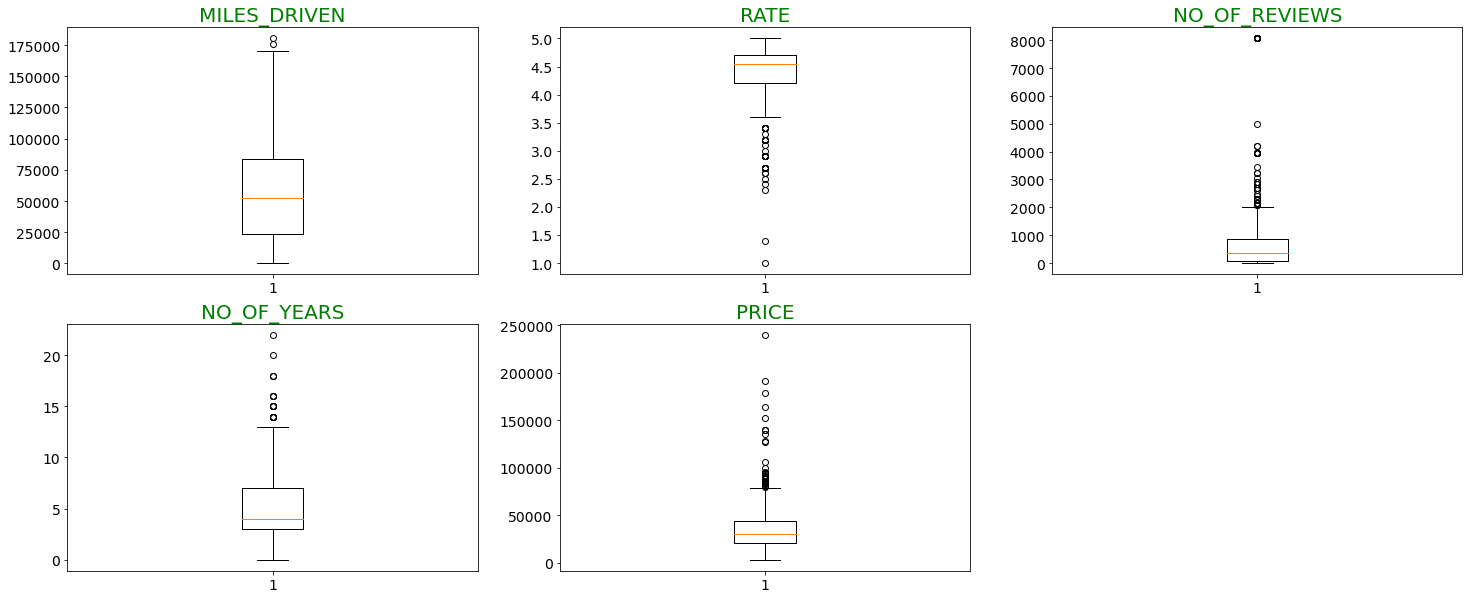

In [64]:
num_feat =["MILES_DRIVEN","RATE","NO_OF_REVIEWS","NO_OF_YEARS","PRICE"]
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.boxplot(df[num_feat[i]])
    plt.title(num_feat[i],color="g",fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
plt.show()
df['MILES_DRIVEN']= winsorize(df['MILES_DRIVEN'],(0,0.15))
df['RATE'] = winsorize(df['RATE'],(0,0.15))
df['NO_OF_REVIEWS']= winsorize(df['NO_OF_REVIEWS'],(0,0.15))
df['PRICE'] = winsorize(df['PRICE'],(0,0.15))
df['MODEL']= winsorize(df['MODEL'],(0,0.15))
plt.rcParams['figure.figsize'] = (25,10)
baslik_font = {'family':'arial','color':'purple','weight':'bold','size':25}

#### Remove outliers

In [65]:
df=df.loc[df["RATE"]>4.0, :] #remove Outlier of RATE

In [66]:
df=df.loc[df["NO_OF_REVIEWS"]<3200, :] #remove Outlier of NO_OF_REVIEWS

In [67]:
df=df.loc[df["NO_OF_YEARS"]<=13, :] #remove Outlier of MODEL

## Visualizations

In [69]:
df.corr()

,MODEL,NO_OF_YEARS,MILES_DRIVEN,RATE,NO_OF_REVIEWS,PRICE
MODEL,1.000000,-0.990099,-0.744882,0.028631,0.010988,0.813197
NO_OF_YEARS,-0.990099,1.000000,0.769401,-0.025534,-0.002733,-0.824295
MILES_DRIVEN,-0.744882,0.769401,1.000000,0.010841,-0.032625,-0.811114
RATE,0.028631,-0.025534,0.010841,1.000000,0.163544,0.008437
NO_OF_REVIEWS,0.010988,-0.002733,-0.032625,0.163544,1.000000,0.004579
PRICE,0.813197,-0.824295,-0.811114,0.008437,0.004579,1.000000


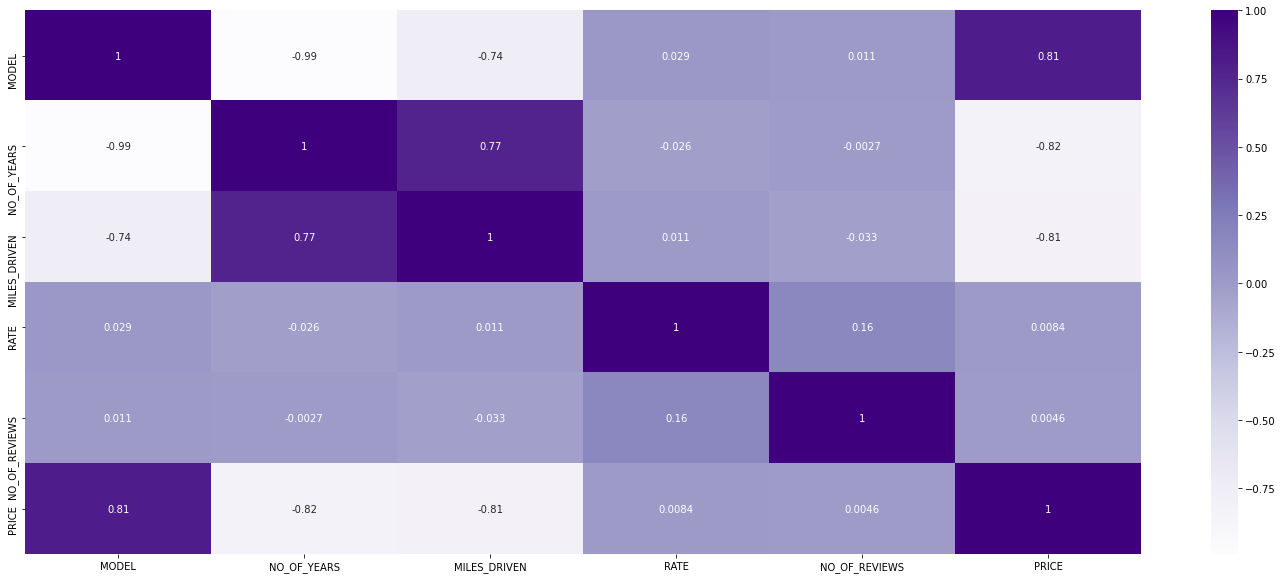

In [70]:
# Plot the correlations between the variables
sns.heatmap(df.corr(), cmap='Purples', annot=True);

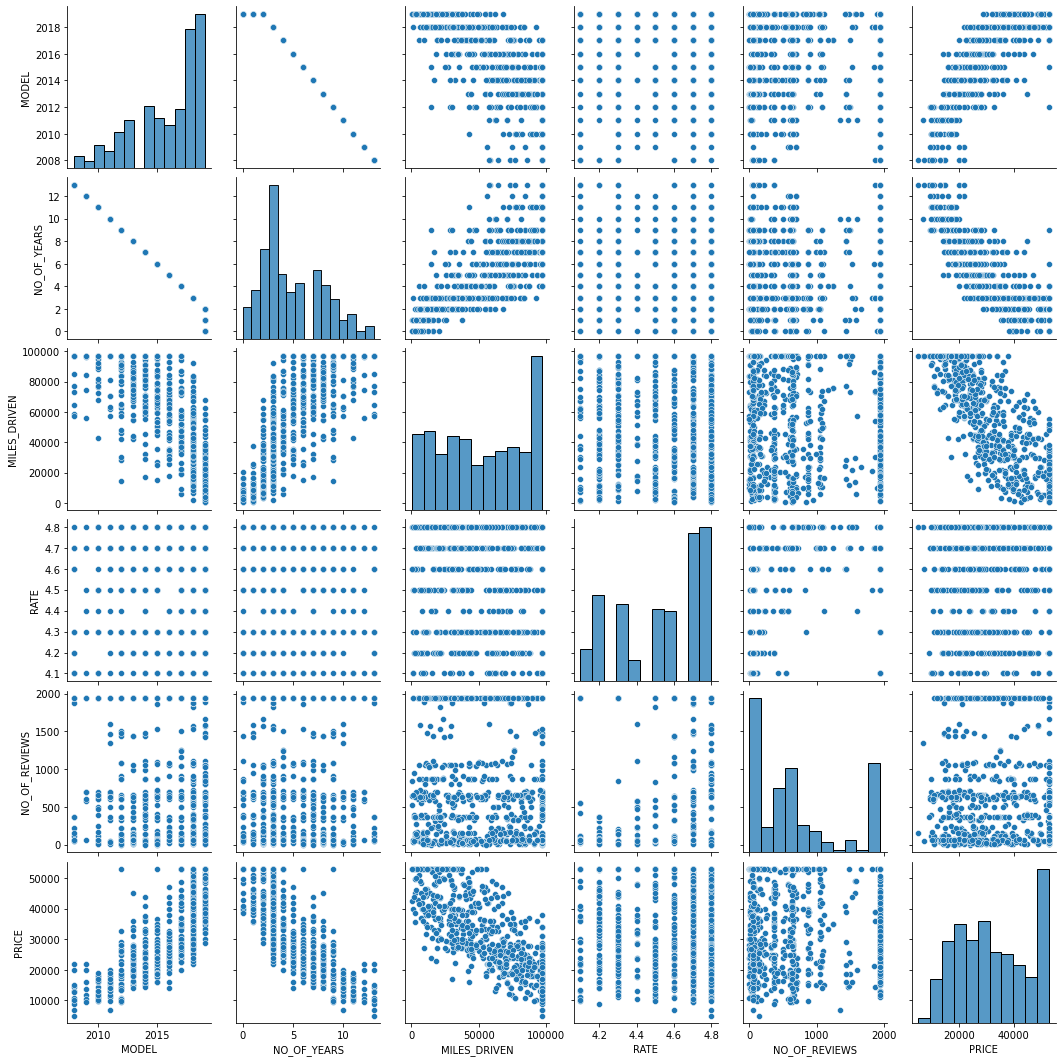

In [71]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(df)

Text(0, 0.5, 'Counts Of Cars')

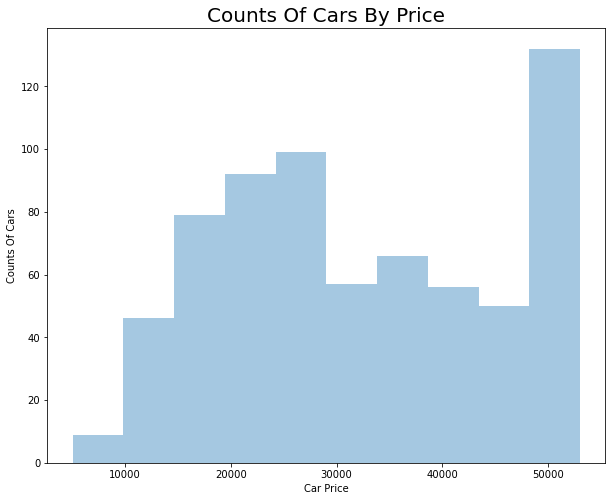

In [76]:
plt.figure(figsize=(10,8))
sns.distplot(df['PRICE'], norm_hist=False, kde=False)
plt.title('Counts Of Cars By Price', size=20)
plt.xlabel('Car Price')
plt.ylabel('Counts Of Cars')

In [72]:
df.to_csv('cars.csv', index=False, encoding='utf-8')